In [1]:
# Install the Kaggle package
!pip install -q kaggle

# Set up the Kaggle configuration
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 /content/kaggle.json

# Download the dataset
!kaggle datasets download -d preatcher/standard-ocr-dataset

chmod: cannot access '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/preatcher/standard-ocr-dataset
License(s): CC0-1.0
 97% 45.0M/46.2M [00:00<00:00, 92.8MB/s]
100% 46.2M/46.2M [00:00<00:00, 83.5MB/s]


In [2]:
import zipfile
import os

# Ekstrak file zip
with zipfile.ZipFile("/content/standard-ocr-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("/content/standard-ocr-dataset")

# List isi direktori
print("Isi direktori:")
print(os.listdir("/content/standard-ocr-dataset"))

Isi direktori:
['data2', 'data']


model

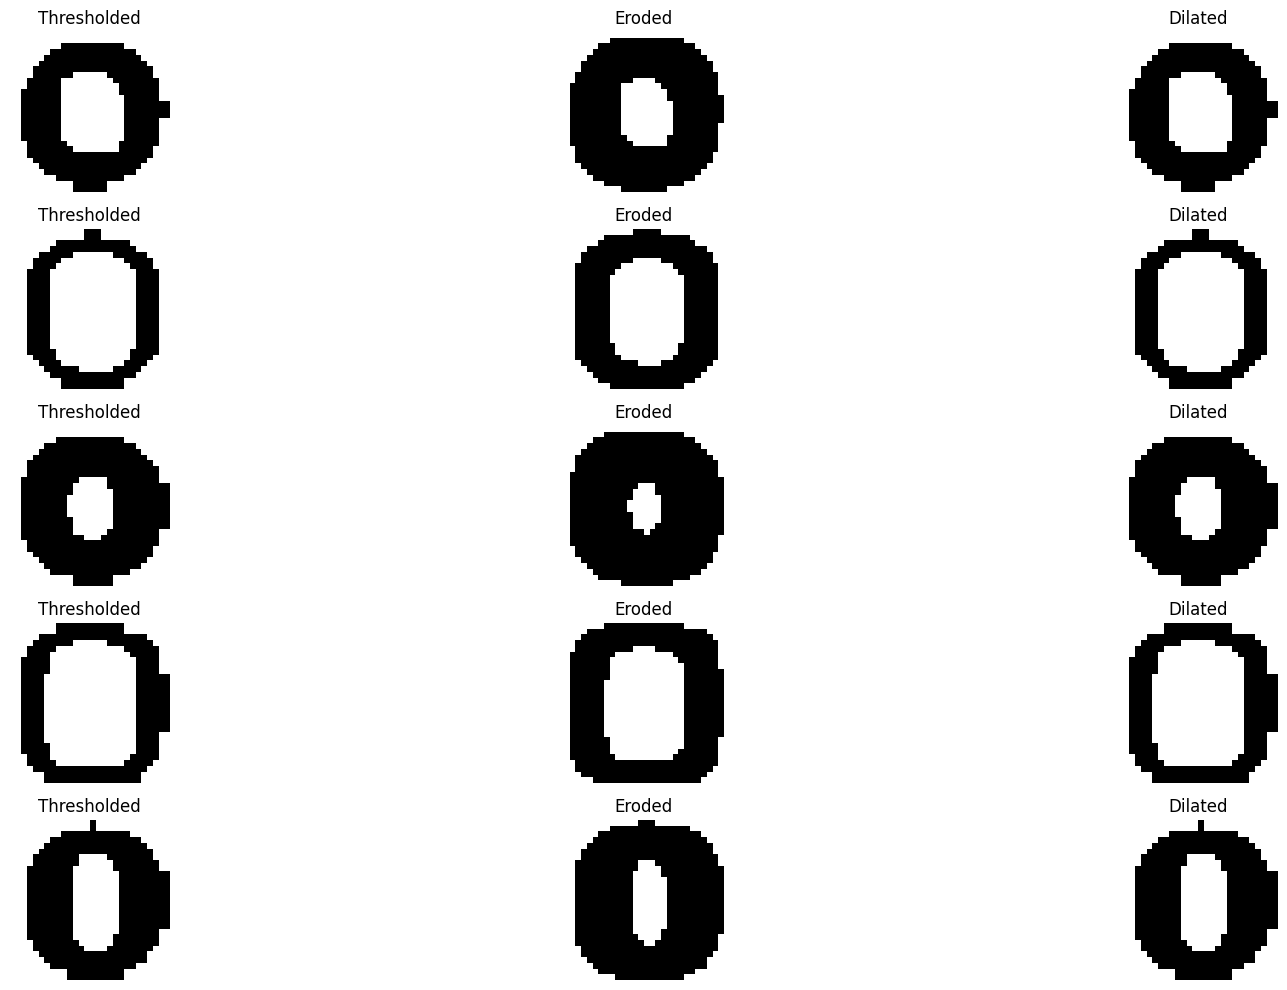

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tampilkan_gambar(folder, image_size=(28, 28)):
    images = [] # inisialisasi list kosong
    labels = []
    label_dict = {}
    label_idx = 0

    # iterasi melalui folder-label dan file-file gambar di dalamnya.
    for label in sorted(os.listdir(folder)):
        label_dict[label_idx] = label
        label_path = os.path.join(folder, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)

            # gambar dibaca dalam format greyscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:

                # setiap gambar diubah ukurannya menjadi ukuran yang diberikan (28x28 piksel)
                img_resize = cv2.resize(img, image_size)

                # nilai piksel di normalisasi ke dalam rentang [0, 1]
                img_normalized = img_resize / 255.0

                # gambar diubah menjadi tipe data bilangan bulat 8-bit unsigned integer.
                img_uint8 = np.uint8(img_normalized * 255)

                # thresholding : Metode Otsu digunakan untuk menentukan nilai threshold yang optimal untuk mengubah gambar menjadi citra biner.
                _, img_thresholded = cv2.threshold(img_uint8, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

                # erosi dan dilasi dilakukan untuk membersihkan dan memperbaiki citra biner.
                img_eroded = cv2.erode(img_thresholded, kernel=np.ones((3, 3), np.uint8), iterations=1)
                img_dilated = cv2.dilate(img_eroded, kernel=np.ones((3, 3), np.uint8), iterations=1)

                # tiap gambar yang telah di pre proses disimpan dalam array images, sedangkan label-labelnya disimpan dalam array labels.
                images.append(img_dilated)
                labels.append(label_idx)
        label_idx += 1
    return np.array(images), np.array(labels), label_dict

X_train, y_train, label_dict_train = tampilkan_gambar("/content/standard-ocr-dataset/data/training_data")
# variabel label_dict_train : kamus yang memetakan indeks label ke nama labelnya untuk setiap kelas dalam data pelatihan

X_test, y_test, label_dict_test = tampilkan_gambar("/content/standard-ocr-dataset/data/testing_data")

banyaknya_gambar= 5
plt.figure(figsize=(20, 10))
for i in range(banyaknya_gambar):

    img_thresholded = X_train[i]
    plt.subplot(5, 3, 3*i+1)
    plt.imshow(img_thresholded, cmap='gray')
    plt.title("Thresholded")
    plt.axis('off')

    img_eroded = cv2.erode(img_thresholded, kernel=np.ones((3, 3), np.uint8), iterations=1)
    plt.subplot(5, 3, 3*i+2)
    plt.imshow(img_eroded, cmap='gray')
    plt.title("Eroded")
    plt.axis('off')

    img_dilated = cv2.dilate(img_eroded, kernel=np.ones((3, 3), np.uint8), iterations=1)
    plt.subplot(5, 3, 3*i+3)
    plt.imshow(img_dilated, cmap='gray')
    plt.title("Dilated")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
X_train, y_train, label_dict_train = tampilkan_gambar("/content/standard-ocr-dataset/data/training_data")
# variabel label_dict_train : kamus yang memetakan indeks label ke nama labelnya untuk setiap kelas dalam data pelatihan

X_test, y_test, label_dict_test = tampilkan_gambar("/content/standard-ocr-dataset/data/testing_data")

print("Data training:")
print("Jumlah gambar:", len(X_train))
print("Jumlah label:", len(y_train))
print("Label dictionary:", label_dict_train)
print()

print("Data testing:")
print("Jumlah gambar:", len(X_test))
print("Jumlah label:", len(y_test))
print("Label dictionary:", label_dict_test)

Data training:
Jumlah gambar: 20628
Jumlah label: 20628
Label dictionary: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}

Data testing:
Jumlah gambar: 1008
Jumlah label: 1008
Label dictionary: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred = knn_model.predict(X_test.reshape(len(X_test), -1))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Gambar dalam variabel X_train direpresentasikan sebagai matriks dua dimensi. Namun, model k-NN memerlukan input berupa array satu dimensi (vektor)

Ukuran gambar datanya adalah 28x28 piksel, maka setiap gambar memiliki 28 baris dan 28 kolom, sehingga ketika direpresentasikan sebagai array dua dimensi, akan memiliki dimensi (28, 28). Dengan melakukan reshape menjadi array satu dimensi dengan X_train.reshape(len(X_train), -1), setiap gambar akan direpresentasikan sebagai array dengan panjang 28x28 = 784 elemen.


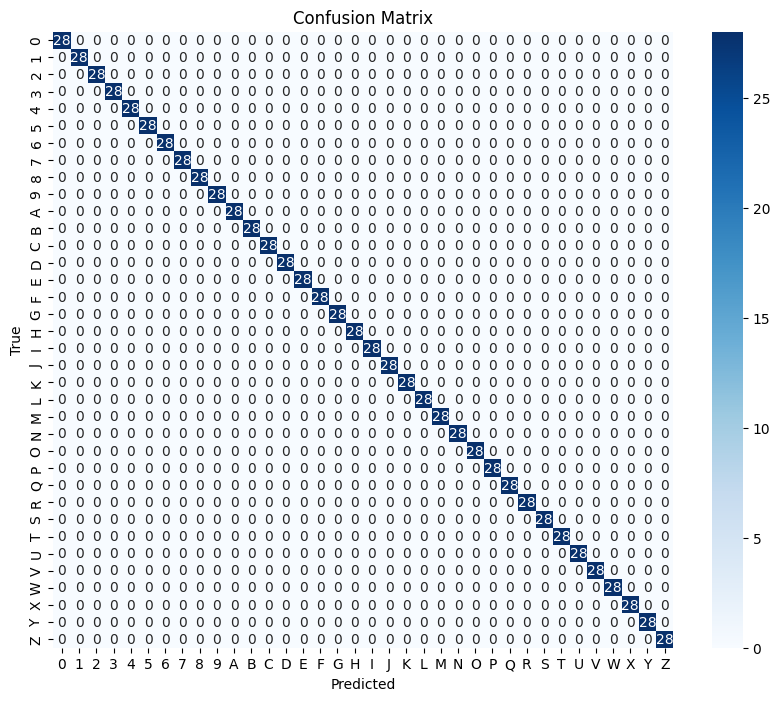

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_dict_test.values(), yticklabels=label_dict_test.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_dict_test.values()))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        28
           A       1.00      1.00      1.00        28
           B       1.00      1.00      1.00        28
           C       1.00      1.00      1.00        28
           D       1.00      1.00      1.00        28
           E       1.00      1.00      1.00        28
           F       1.00      1.00      1.00        28
           G       1.00      1.00      1.00        28
    

In [8]:
import pickle

model_filename = 'knn_modell.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(knn_model, f)
print("Model telah disimpan sebagai", model_filename)


Model telah disimpan sebagai knn_modell.pkl


TESTING


In [9]:
# Install the Kaggle package
!pip install -q kaggle

# Set up the Kaggle configuration
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!chmod 600 /content/kaggle.json

# Download the dataset
!kaggle datasets download -d aslanahmedov/number-plate-detection

chmod: cannot access '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/aslanahmedov/number-plate-detection
License(s): copyright-authors
 97% 401M/413M [00:03<00:00, 144MB/s]
100% 413M/413M [00:03<00:00, 134MB/s]


In [10]:
import os
import shutil
import zipfile
# Ekstrak file zip
with zipfile.ZipFile("/content/number-plate-detection.zip", "r") as zip_ref:
    zip_ref.extractall("/content/number-plate-detection")

print("Isi direktori:")
print(os.listdir("/content/number-plate-detection"))

images_folder = "/content/number-plate-detection/images"
labels_folder = os.path.join(images_folder, "labels")
data_folder = os.path.join(images_folder, "data")

# Buat folder label
if not os.path.exists(labels_folder):
    os.makedirs(labels_folder)
    print("Folder 'labels' berhasil dibuat.")

# Buat folder data
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    print("Folder 'data' berhasil dibuat.")

# Iterasi melalui setiap file gambar dalam folder gambar
for file_name in os.listdir(images_folder):
    if file_name.endswith(".xml"):
        # Buat path lengkap untuk file gambar dan label
        image_path = os.path.join(images_folder, file_name)
        label_path = os.path.join(labels_folder, file_name)

        # Copy file gambar ke folder label
        shutil.copy(image_path, label_path)
        print(f"File '{file_name}' berhasil disalin ke folder label.")

    elif file_name.endswith((".jpg", ".jpeg")):
        # Buat path lengkap untuk file gambar dan label
        image_path = os.path.join(images_folder, file_name)
        data_path = os.path.join(data_folder, file_name)

        # Copy file gambar ke folder data
        shutil.copy(image_path, data_path)
        print(f"File '{file_name}' berhasil disalin ke folder data.")
print("Proses penyalinan selesai.")

Isi direktori:
['images', 'data.yaml', 'TEST']
Folder 'labels' berhasil dibuat.
Folder 'data' berhasil dibuat.
File 'N167.xml' berhasil disalin ke folder label.
File 'N65.jpeg' berhasil disalin ke folder data.
File 'N238.xml' berhasil disalin ke folder label.
File 'N148.jpeg' berhasil disalin ke folder data.
File 'N178.xml' berhasil disalin ke folder label.
File 'N134.xml' berhasil disalin ke folder label.
File 'N52.xml' berhasil disalin ke folder label.
File 'N221.xml' berhasil disalin ke folder label.
File 'N79.xml' berhasil disalin ke folder label.
File 'N21.jpeg' berhasil disalin ke folder data.
File 'N62.jpeg' berhasil disalin ke folder data.
File 'N128.xml' berhasil disalin ke folder label.
File 'N214.jpeg' berhasil disalin ke folder data.
File 'N200.jpeg' berhasil disalin ke folder data.
File 'N99.jpeg' berhasil disalin ke folder data.
File 'N222.jpeg' berhasil disalin ke folder data.
File 'N144.jpeg' berhasil disalin ke folder data.
File 'N50.jpeg' berhasil disalin ke folder da

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
from keras.models import load_model
import joblib

# load pre-trained model character recognition
ocr_model = joblib.load('/content/knn_modell.pkl')

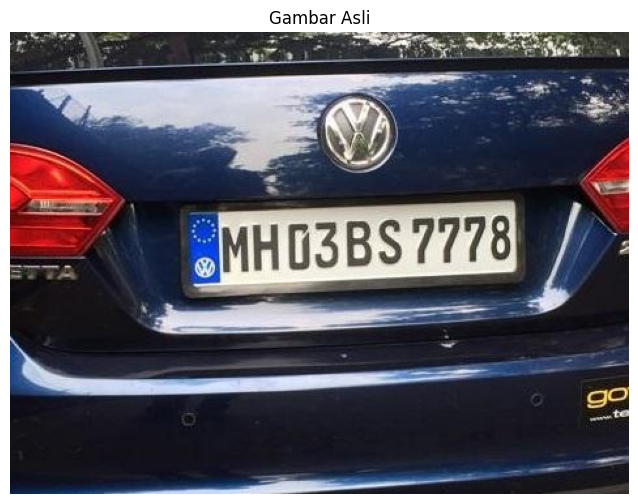

In [12]:
img_ori = cv2.imread('/content/number-plate-detection/images/data/N99.jpeg')
height, width, channel = img_ori.shape
# Mengonversi warna gambar dari BGR ke RGB
img_rgb = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()


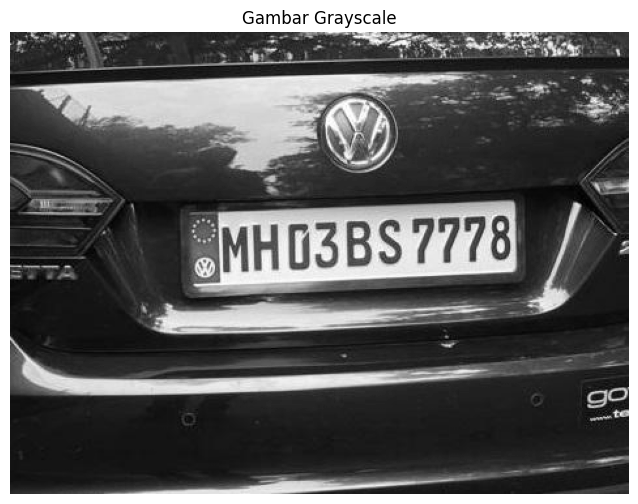

In [13]:
# mengonversi gambar ke grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Gambar Grayscale')
plt.show()

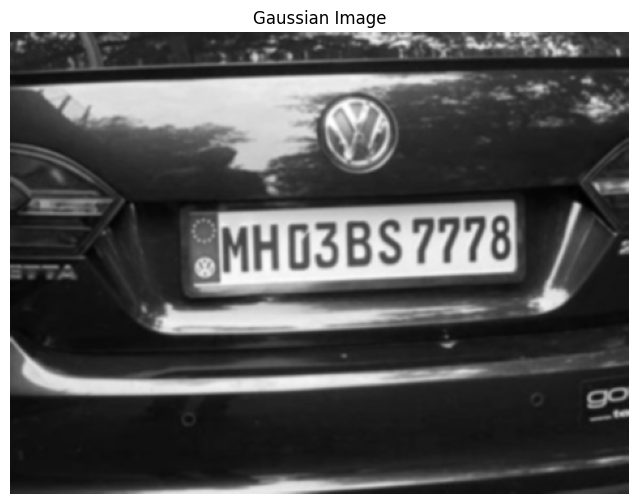

In [14]:
# mengaburkan gambar menggunakan GaussianBlur untuk mengurangi noise

# nilai ksize (atau kernel size) (5, 5)
# kernel yang digunakan memiliki dimensi 5x5. Ini berarti bahwa dalam proses blurring, setiap piksel akan dipengaruhi oleh nilai piksel di sekitarnya dalam jarak 5 piksel.

# parameter sigmaX adalah parameter yang mengontrol dispersi gaussian.
# semakin besar nilai sigmaX, semakin besar efek blurring yang dihasilkan.

img_blurred = cv2.GaussianBlur(img_gray, ksize=(5, 5), sigmaX=0)
plt.figure(figsize=(8, 6))
plt.imshow(img_blurred, cmap='gray')
plt.axis('off')
plt.title('Gaussian Image')
plt.show()

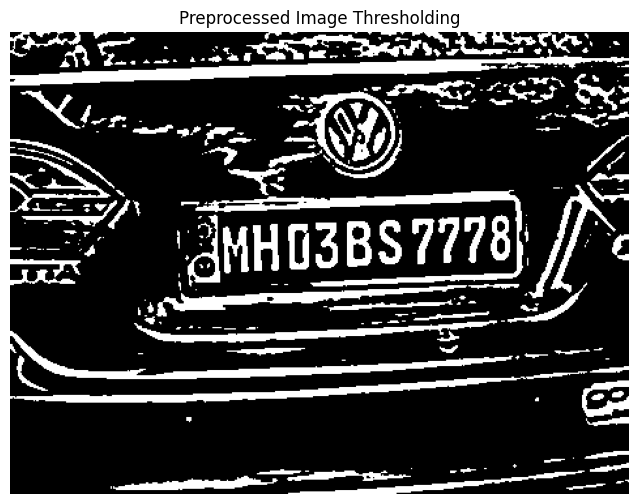

In [15]:
# menggunakan adaptive thresholding
img_processed = cv2.adaptiveThreshold(
    img_blurred,

    # parameter maxValue: nilai maksimum yang akan diberikan pada piksel yang melewati ambang batas.
    maxValue=255.0,

    # parameter adaptiveMethod:  metode yang digunakan untuk menghitung nilai ambang batas adaptif.
    # menggunakan cv2.ADAPTIVE_THRESH_GAUSSIAN_C, yang berarti bahwa nilai ambang batas dihitung sebagai rata-rata tertimbang di sekitar setiap piksel menggunakan kernel Gaussian.
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,

    # cv2.THRESH_BINARY_INV digunakan untuk menghasilkan citra biner di mana piksel di atas ambang batas akan diubah menjadi hitam (0) dan piksel di bawah ambang batas akan diubah menjadi putih (255).
    thresholdType=cv2.THRESH_BINARY_INV,

    # nilai ambang batas dihitung dengan menggunakan rata-rata tertimbang dari intensitas piksel dalam area tertentu di sekitar setiap piksel, yang ditentukan oleh blockSize.
    # selain itu, konstanta C juga ditambahkan atau dikurangkan dari rata-rata tersebut untuk menyesuaikan nilai ambang batas. Semakin besar nilai C, semakin besar pengaruhnya terhadap nilai ambang batas.

    blockSize=19, # menghitung nilai ambang batas menggunakan area 19x19 piksel di sekitar setiap piksel.
    C=9
)
# nilai ambang batas dalam thresholding adaptif adalah nilai yang digunakan untuk membedakan antara piksel objek dan latar belakang dalam gambar.

plt.figure(figsize=(8, 6))
plt.imshow(img_processed, cmap='gray')
plt.axis('off')
plt.title('Preprocessed Image Thresholding')
plt.show()

Dilasi: Memperluas area objek dalam citra dengan struktur tertentu yang disebut kernel atau elemen struktur. Dilasi digunakan untuk mengisi celah-celah kecil dalam objek, menghubungkan objek terpisah, atau memperbesar dimensi objek.

Erosi: Mengurangi area objek dalam citra dengan struktur yang sama seperti dilasi. Erosi digunakan untuk menghilangkan noise, memisahkan objek yang saling melekat, atau mengurangi dimensi objek.

1. **Dilasi**:
   - Dilasi digunakan untuk menambahkan atau memperluas wilayah piksel yang bernilai 1 (putih) dalam gambar biner.
   - Proses dilasi dilakukan dengan menggunakan fungsi `cv2.dilate()` yang mengambil tiga argumen: gambar yang akan diproses, kernel yang digunakan untuk dilasi, dan jumlah iterasi yang menentukan seberapa besar efek dilasi yang akan dilakukan.
   - Pada contoh ini, dilakukan dilasi pada gambar hasil proses thresholding adaptif (`img_processed`) menggunakan kernel `np.ones((3, 3), np.uint8)` yang berukuran 3x3 piksel dengan tipe data unsigned integer 8-bit. Iterasi dilakukan sebanyak satu kali (`iterations=1`).
   - Hasil dilasi disimpan dalam variabel `img_dilated`.

2. **Erosi**:
   - Erosi adalah operasi morfologi citra yang digunakan untuk mengurangi wilayah piksel yang bernilai 1 (putih) dalam gambar biner.
   - Pada contoh ini, dilakukan erosi pada gambar hasil dilasi sebelumnya (`img_dilated`) menggunakan kernel yang sama dengan kernel dilasi, yaitu `np.ones((3, 3), np.uint8)`, dan iterasi dilakukan sebanyak satu kali.
   - Hasil erosi disimpan dalam variabel `img_eroded`.

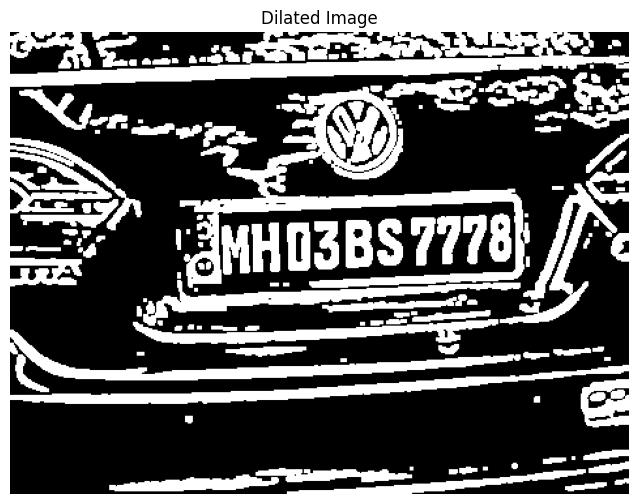

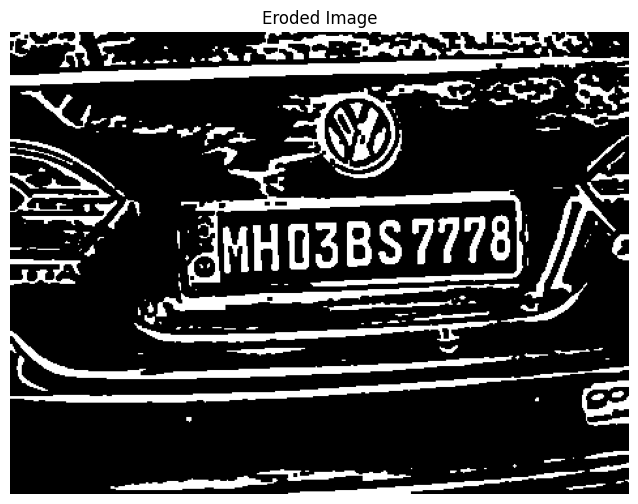

In [16]:
kernel = np.ones((3, 3), np.uint8)

# proses dilasi
img_dilated = cv2.dilate(img_processed, kernel, iterations=1)

plt.figure(figsize=(8, 6))
plt.imshow(img_dilated, cmap='gray')
plt.axis('off')
plt.title('Dilated Image')
plt.show()

# proses erosi
img_eroded = cv2.erode(img_dilated, kernel, iterations=1)

plt.figure(figsize=(8, 6))
plt.imshow(img_eroded, cmap='gray')
plt.axis('off')
plt.title('Eroded Image')
plt.show()

1. **`cv2.findContours()`**: Fungsi ini digunakan untuk menemukan kontur dalam gambar biner.
   - Parameter pertama (`img_dilated`) adalah gambar biner di mana kontur akan dicari.
   - Parameter `mode` (`cv2.RETR_LIST`) setiap kontur yang ditemukan akan dianggap sebagai kontur yang independen, tanpa memperhatikan hubungan hierarkis antara kontur-kontur tersebut.
   - Parameter `method` (`cv2.CHAIN_APPROX_SIMPLE`) menentukan metode pendekatan untuk menyimpan kontur. `CHAIN_APPROX_SIMPLE` mengkompresi kontur dengan menggunakan pendekatan yang sederhana dan menghilangkan titik-titik yang tidak relevan untuk menghemat memori.

2. **Menggambar Kontur**: Kontur yang ditemukan kemudian digambar pada gambar hitam kosong (`temp_result`) menggunakan fungsi `cv2.drawContours()`.
   - `temp_result` adalah gambar kosong dengan ukuran yang sama dengan gambar asli.
   - Kontur yang ditemukan disimpan dalam variabel `contours`.
   - `contourIdx=-1` menandakan bahwa semua kontur yang ditemukan akan digambar.
   - `color=(255, 255, 255)` adalah warna putih yang digunakan untuk menggambar kontur.

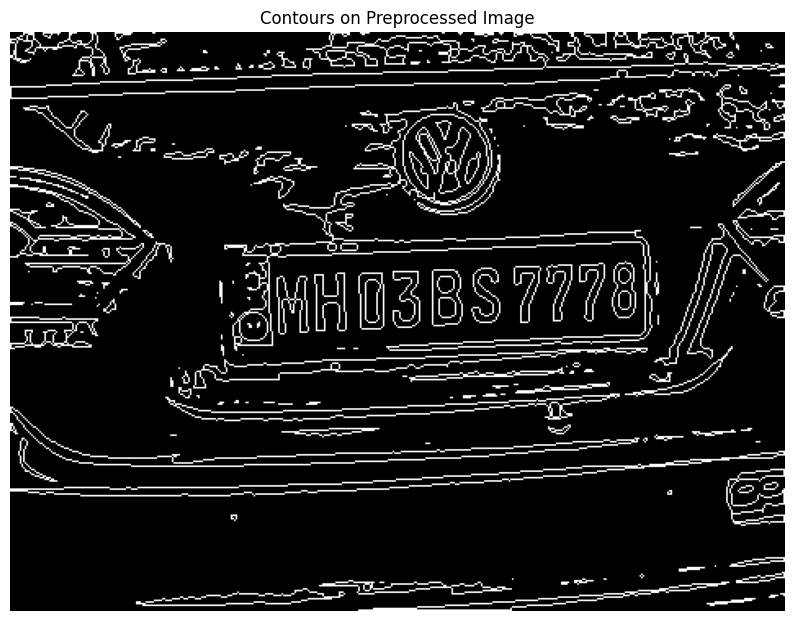

In [17]:
# menemukan dan menampilkan kontur pada gambar yang telah diproses
contours, _ = cv2.findContours(
    img_eroded,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)
temp_result = np.zeros((height, width, channel), dtype=np.uint8)
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))
plt.figure(figsize=(10, 8))
plt.imshow(temp_result)
plt.axis('off')
plt.title('Contours on Preprocessed Image')
plt.show()

potong area plat nomernya saja

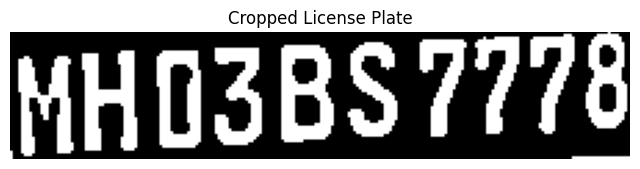

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

x = 160
y = 140
plat_width = 224
plat_height = 46

cropped_image = img_eroded[y:y+plat_height, x:x+plat_width]

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Cropped License Plate')
plt.show()

disini kita akan mencari tau berapa bounding box dan ukuran yang terdeteksi, dan didapatkan bounding box yang terdeteksi sebanyak 17

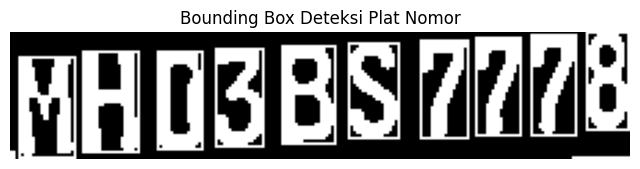

Jumlah bounding box yang terdeteksi: 17
Ukuran area semua bounding box: [0.0, 0.0, 110.0, 69.0, 189.0, 84.0, 304.0, 477.5, 333.0, 262.5, 50.0, 555.0, 262.5, 224.0, 213.5, 209.5, 380.5]


In [26]:
# Mencari kontur pada gambar yang dipotong
cropped_contours, _ = cv2.findContours(
    cropped_image,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

# buat nyimpen bounding boxnya
bounding_box_areas = []

cropped_temp_result = cropped_image.copy()
for contour in cropped_contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    bounding_box_areas.append(area)
    cv2.rectangle(cropped_temp_result, (x, y), (x + w, y + h), (255, 255, 255), 1)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cropped_temp_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bounding Box Deteksi Plat Nomor')
plt.show()

print("Jumlah bounding box yang terdeteksi:", len(cropped_contours))
print("Ukuran area semua bounding box:", bounding_box_areas)

mengambil bounding box sebanyak 10 sesuai dengan posisi karakternya

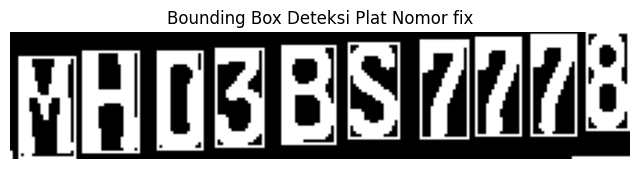

Jumlah bounding box yang terdeteksi: 10
Ukuran area semua bounding box yang memenuhi kriteria: [304.0, 477.5, 333.0, 262.5, 555.0, 262.5, 224.0, 213.5, 209.5, 380.5]


In [27]:
cropped_contours, _ = cv2.findContours(
    cropped_image,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

bounding_box_areas = []

cropped_temp_result = cropped_image.copy()
for contour in cropped_contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    if area >= 209: # disini kita masukkan area minimalnya supaya dapat bounding box diplatnya aja
        bounding_box_areas.append(area)
        cv2.rectangle(cropped_temp_result, (x, y), (x + w, y + h), (255, 255, 255), 1)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cropped_temp_result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Bounding Box Deteksi Plat Nomor fix')
plt.show()
print("Jumlah bounding box yang terdeteksi:", len(bounding_box_areas))
print("Ukuran area semua bounding box yang memenuhi kriteria:", bounding_box_areas)

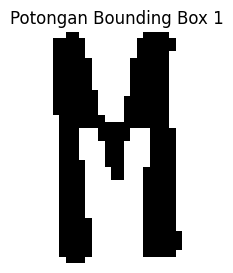

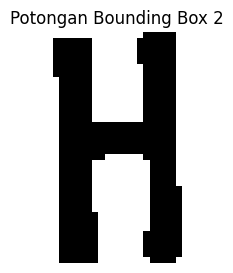

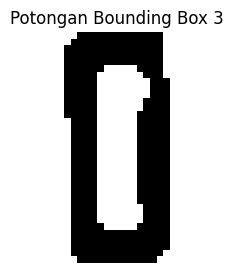

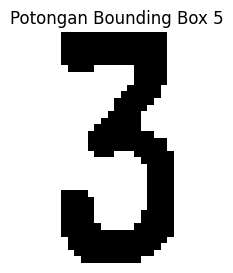

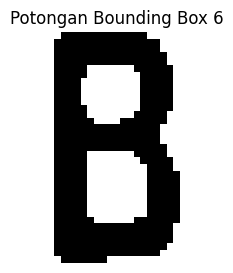

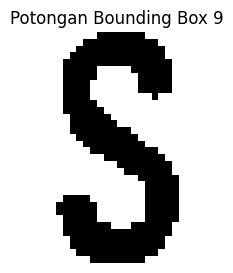

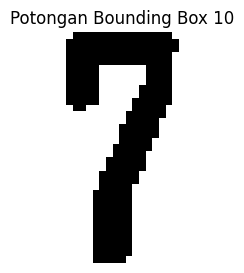

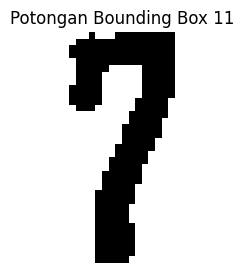

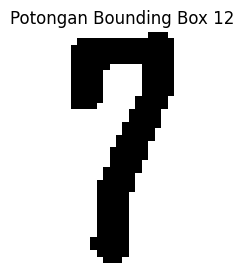

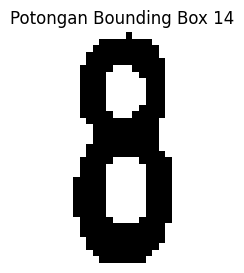

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Karena modelnya itu yang terdeteksi warna hitam, dan disini ternyata characternya warna putih, jadi kita balik warnanya
def invert_colors(img):
    return cv2.bitwise_not(img)

folder_path = "baru"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Nge cropnya diurutkan dari sebelah kiri
cropped_contours_sorted = sorted(cropped_contours, key=lambda c: cv2.boundingRect(c)[0])

for i, contour in enumerate(cropped_contours_sorted):
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    if area >= 209:
        cropped_box = cropped_image[y:y+h, x:x+w]
        # Membalikkan warna gambar
        inverted_box = invert_colors(cropped_box)
        file_name = os.path.join(folder_path, f'hasil_{i}.jpg')
        cv2.imwrite(file_name, inverted_box)
        plt.figure(figsize=(4, 3))
        plt.imshow(cv2.cvtColor(inverted_box, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Potongan Bounding Box {i}')
        plt.show()

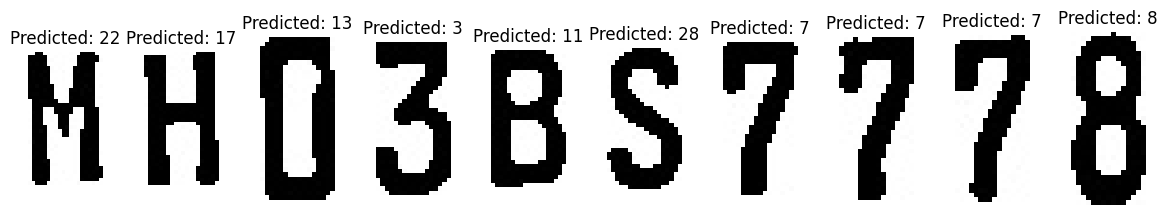

In [24]:
import re

# Fungsi untuk mengenali karakter pada setiap potongan gambar
def recognize_characters(folder_path):
    # Mendapatkan daftar nama file yang akan diurutkan
    file = sorted([f for f in os.listdir(folder_path) if f.endswith(".jpg")], key=lambda x: int(re.search(r'\d+', x).group()))
    # Atur ukuran plot
    plt.figure(figsize=(12, 6))
    # Atur jumlah kolom untuk subplot
    kulom = len(file)  # Satu file per kolom
    # Lakukan iterasi pada setiap file dalam folder
    for idx, file_name in enumerate(file):
        file_path = os.path.join(folder_path, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (28, 28))

        predicted_label = knn_model.predict(img_resized.flatten().reshape(1, -1))

        plt.subplot(2, kulom, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_label[0]}")
        plt.axis('off')
    plt.tight_layout(pad=3.0)
    plt.show()

recognize_characters(folder_path)

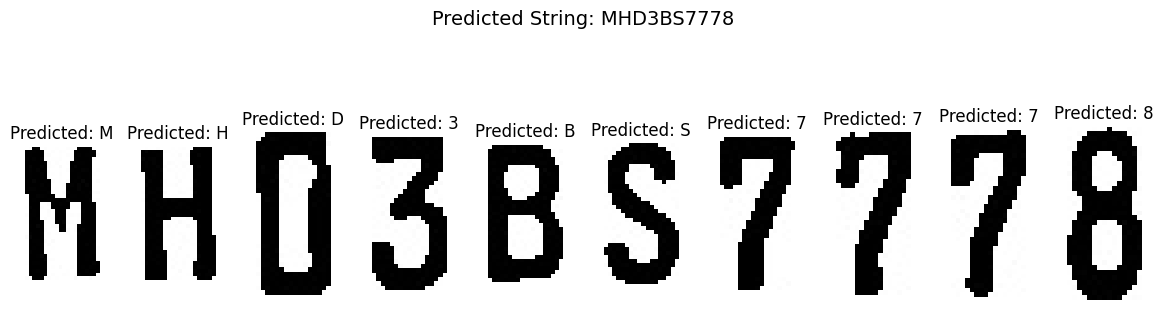

In [25]:
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
import re

label_dict = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}

knn_model = joblib.load("/content/knn_modell.pkl")

def recognize_characters(folder_path):
    file_names = sorted([f for f in os.listdir(folder_path) if f.endswith(".jpg")], key=lambda x: int(re.search(r'\d+', x).group()))
    plt.figure(figsize=(12, 6))
    kolom = len(file_names)

    predicted_chars = []

    for idx, file_name in enumerate(file_names):
        file_path = os.path.join(folder_path, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (28, 28))
        predicted_label = knn_model.predict(img_resized.flatten().reshape(1, -1))

        # Konversi label yang diprediksi menjadi karakter yang sesuai
        predicted_char = label_dict[predicted_label[0]]

        # Tambahkan karakter hasil prediksi ke list
        predicted_chars.append(predicted_char)
        plt.subplot(2, kolom, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {predicted_char}")
        plt.axis('off')


    predicted_string = "".join(predicted_chars)
    plt.suptitle(f"Predicted String: {predicted_string}", fontsize=14)
    plt.tight_layout(pad=3.0)
    plt.show()
recognize_characters(folder_path)